 ## Exercise 5: Regularized logistic regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

X = np.loadtxt('A2_datasets_2020/microchips.csv', delimiter=',', usecols=(0,1))
y = np.loadtxt('A2_datasets_2020/microchips.csv', delimiter=',', usecols=2)

 <ul>
     <li>function to plot the decision boundaries using the logistic regression classifier from sklearn</li>
 </ul>

In [20]:
def plotting_boundaries(Xn, betas, y, degree):
    h = 0.01
    x_min, x_max = Xn[:,0].min()-0.1, Xn[:,0].max()+0.1
    y_min, y_max = Xn[:,1].min()-0.1, Xn[:,1].max()+0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    x1, x2 = xx.ravel(), yy.ravel()
    Xe = utils.mapFeatures(x1, x2, degree)
    classes = logreg.predict(Xe)
    mesh_classes = classes.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # mesh plot
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) # colors
    
    plt.pcolormesh(xx, yy,mesh_classes, cmap=cmap_light)
    plt.scatter(Xn[:,0], Xn[:,1], c=y, marker='.', cmap=cmap_bold)


 <ul>
   <li>Create lists used to plot degress vs number of errors</li>
   <li> Produce a subplot 3x3 showing the decision boundarie for corresponing degree when the model is unregulized
 </ul>

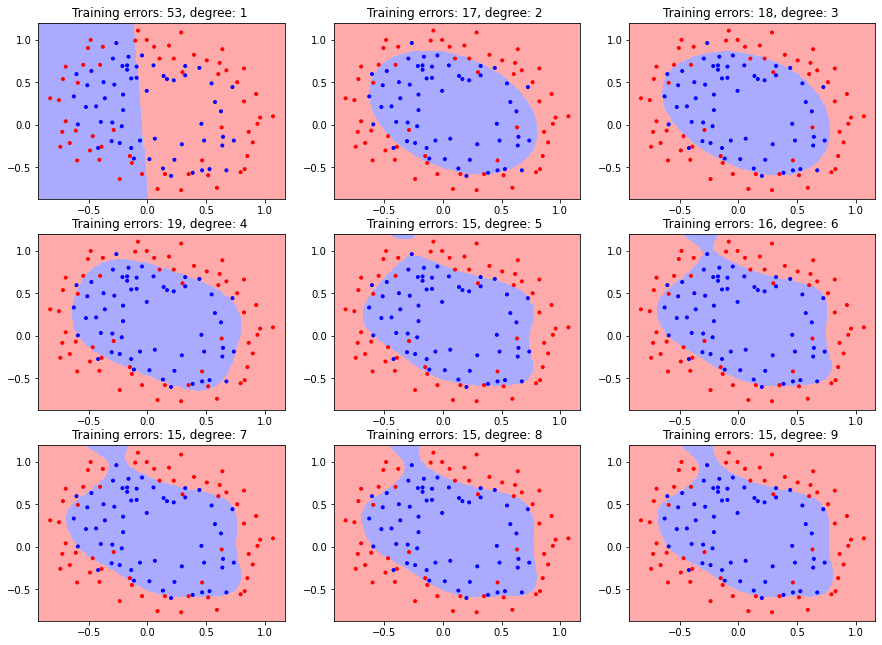

In [21]:
error_list_unreg = []
error_list_reg = []
plt.figure(1,figsize=(15,11))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    Xe = utils.mapFeatures(X[:,0], X[:,1], i)
    logreg = LogisticRegression(C=10000, tol=1e-6, max_iter=1000)
    logreg.fit(Xe, y)
    y_predict = logreg.predict(Xe)
    errors = np.sum(y_predict!=y)
    error_list_unreg.append(errors)
    betas = logreg.coef_.flatten()
    plotting_boundaries(X, betas, y, i)
    plt.title(f'Training errors: {errors}, degree: {i} ')

 <ul>
   <li>Produce a subplot 3x3 showing the decision boundarie for corresponing degree when the model is regulized
 </ul>

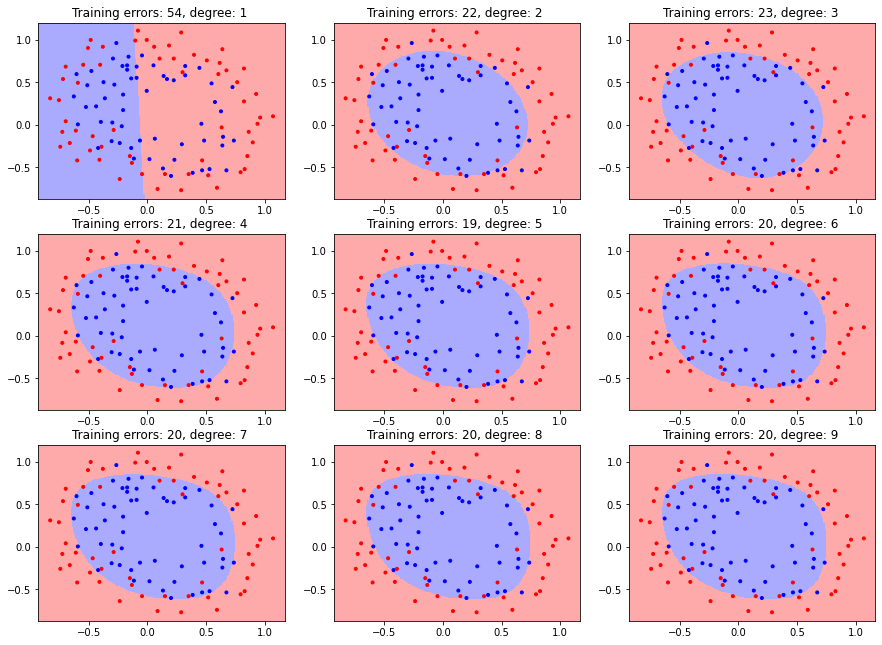

In [22]:
plt.figure(2,figsize=(15,11))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    Xe = utils.mapFeatures(X[:,0], X[:,1], i)
    logreg = LogisticRegression(C=1, tol=1e-6)
    logreg.fit(Xe, y)
    y_predict = logreg.predict(Xe)
    errors = np.sum(y_predict!=y)
    error_list_reg.append(errors)
    betas = logreg.coef_.flatten()
    plotting_boundaries(X, betas, y, i)
    plt.title(f'Training errors: {errors}, degree: {i} ')

 In the regularized model we get more training errors, as we can see the decision boundarie edges are smooth out
 as a result of shrinking the coefficients(betas) towards zero.
 <ul>
   <li>Produce a plot for visualizing the difference between the regularized and the unregularized model
 </ul>

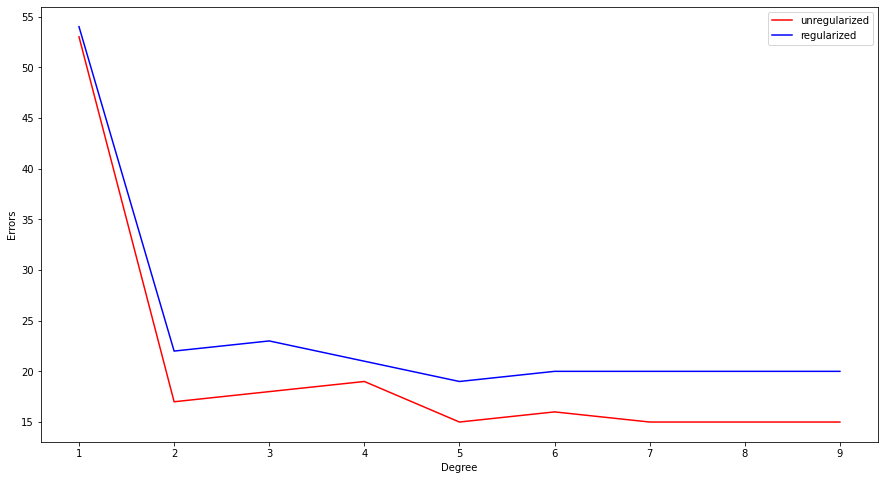

In [23]:
plt.figure(3,figsize=(15,8))
degress = [1,2,3,4,5,6,7,8,9]
plt.plot(degress, error_list_unreg, 'r', label='unregularized')
plt.plot(degress, error_list_reg, 'b', label='regularized')
plt.xlabel('Degree')
plt.ylabel('Errors')
plt.legend()
plt.show()